In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from matplotlib import pyplot as plt
from collections import Counter


In [4]:
version = 3 # just 3 is available
ds = tfds.load(f'speech_commands:0.0.{version}')
train = ds['train']
val = ds['validation']
test = ds['test']

2024-07-07 12:02:12.447028: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-07-07 12:02:12.447111: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-07-07 12:02:12.447132: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-07-07 12:02:12.447439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-07 12:02:12.447503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
print(train)

<_PrefetchDataset element_spec={'audio': TensorSpec(shape=(None,), dtype=tf.int16, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [6]:
for example in train.take(1):
    print(example)

{'audio': <tf.Tensor: shape=(16000,), dtype=int16, numpy=array([-15, -18, -12, ...,  16,  21,  25], dtype=int16)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=4>}


2024-07-04 16:43:10.040437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
def plot_label_distribution(dataset,title):
    # Step 1: Extract labels from the dataset
    labels = [element['label'].numpy() for element in dataset]

    # Step 2: Count the occurrences of each label
    label_counts = Counter(labels)

    # Get the labels and their counts
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    # Step 3: Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title, size=20)
    plt.show()

2024-07-04 16:43:13.481284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


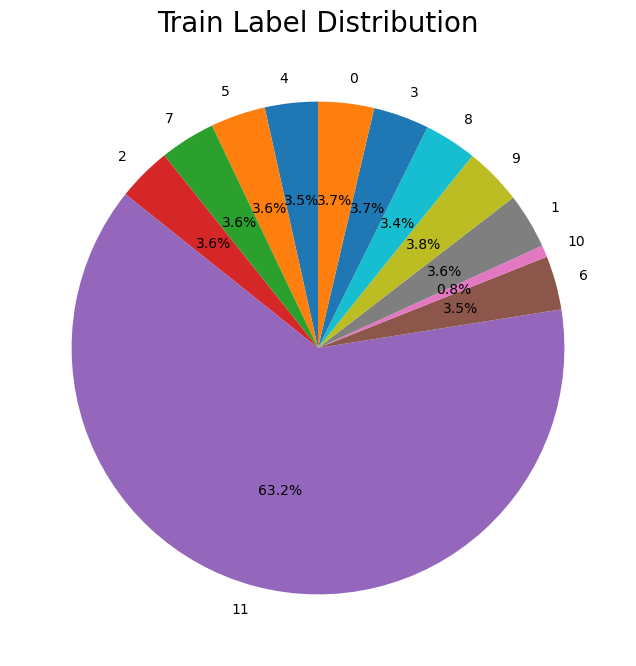

2024-07-04 16:43:14.019912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


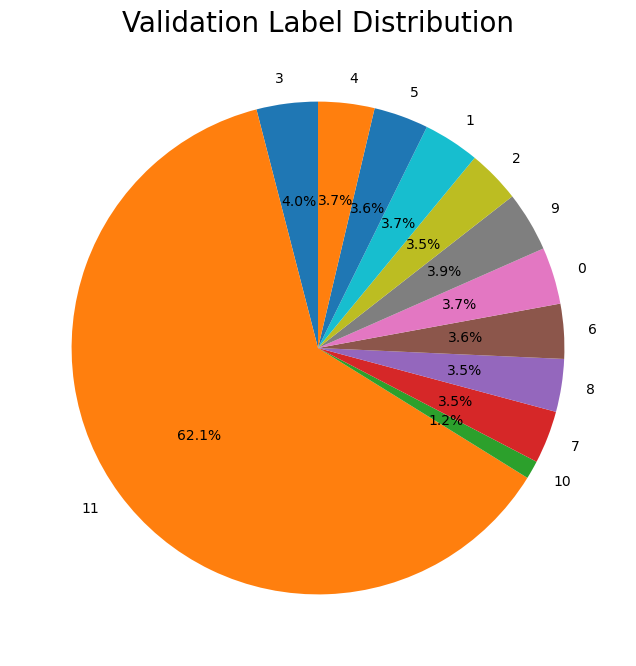

2024-07-04 16:43:14.359739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


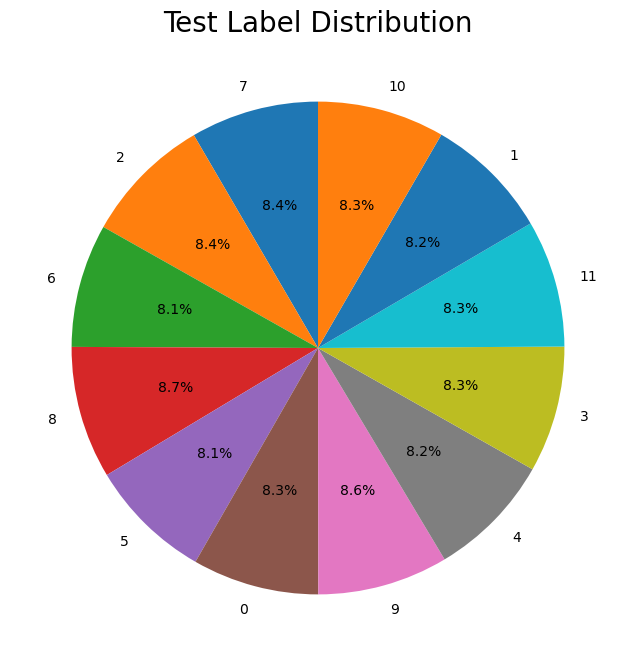

In [8]:
plot_label_distribution(train,'Train Label Distribution')
plot_label_distribution(val,'Validation Label Distribution')
plot_label_distribution(test,'Test Label Distribution')

In [9]:
def select_one_tensor_per_category(tensor_list):
    """
    Select one tensor from each category (label).
    
    Args:
    tensor_list (list of dict): A list where each element is a dictionary 
                                containing 'audio' and 'label' keys.
    
    Returns:
    list of dict: A list of selected tensors, one from each category.
    """
    category_dict = {}
    
    for item in tensor_list:
        audio = item['audio'] 
        label = item['label'].numpy()  # Convert to numpy for easier handling
        
        if label not in category_dict:
            category_dict[label] = audio
            
    selected_tensors = [{'audio': audio, 'label':tf.convert_to_tensor(label)} 
                        for label, audio in category_dict.items()]
    
    return selected_tensors


In [10]:
categorial_tensors = select_one_tensor_per_category(train)

2024-07-04 16:43:17.740032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
print(len(categorial_tensors))

12


In [12]:


def plot_signals_time(titles, signals):
    nrows, ncols = 2, 6
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6))

    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i, y].set_title(titles[z])
            ax[i, y].plot(signals[z])
            ax[i, y].set_xticks([])
            ax[i, y].set_yticks([])
            ax[i, y].grid(False)
            z += 1

    plt.show()

In [13]:
#sort categorial_tensors by label
categorial_tensors = sorted(categorial_tensors, key=lambda x: x['label'].numpy())

In [5]:
#get the labels,indexes from the dataset builder
info = tfds.builder(f'speech_commands:0.0.{version}').info
labels = info.features['label'].names
labels_index = info.features['label'].num_classes
info

tfds.core.DatasetInfo(
    name='speech_commands',
    full_name='speech_commands/0.0.3',
    description="""
    An audio dataset of spoken words designed to help train and evaluate keyword
    spotting systems. Its primary goal is to provide a way to build and test small
    models that detect when a single word is spoken, from a set of ten target words,
    with as few false positives as possible from background noise or unrelated
    speech. Note that in the train and validation set, the label "unknown" is much
    more prevalent than the labels of the target words or background noise. One
    difference from the release version is the handling of silent segments. While in
    the test set the silence segments are regular 1 second files, in the training
    they are provided as long segments under "background_noise" folder. Here we
    split these background noise into 1 second clips, and also keep one of the files
    for the validation set.
    """,
    homepage='https://arxiv.or

In [15]:
#convert the labels to text
categorial_audio = [{'audio': item['audio'].numpy(), 'label':f'{i} ' + labels[item['label'].numpy()]} for i,item in enumerate(categorial_tensors)]

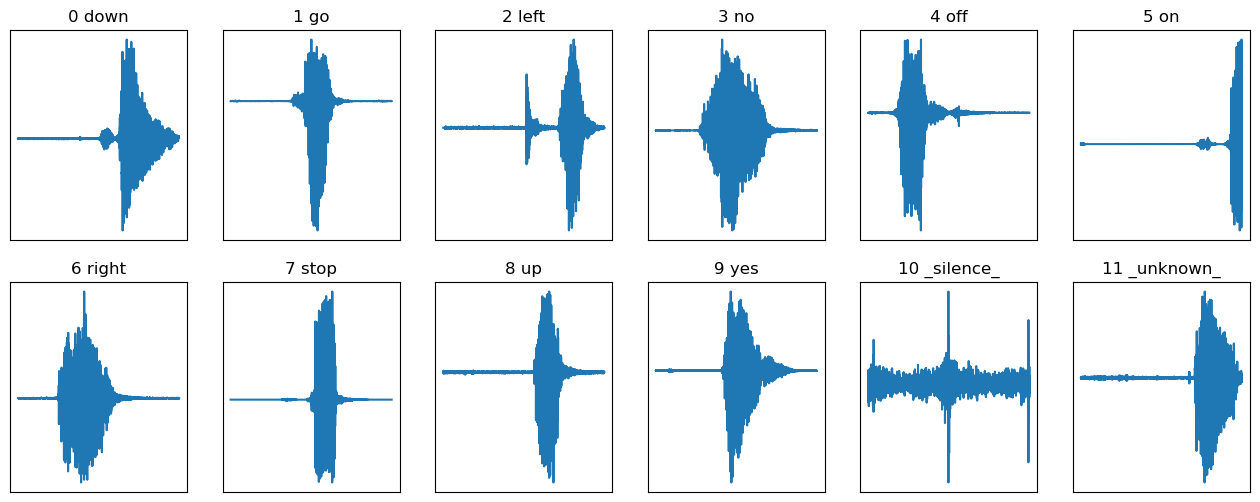

In [16]:
titles = [f'{item["label"]}' for item in categorial_audio]
signals = [item['audio'] for item in categorial_audio]
plot_signals_time(titles, signals)

In [17]:
#check that audio match the label
import IPython.display as ipd
for item in categorial_audio:
    print(item['label'])
    ipd.display(ipd.Audio(item['audio'], rate=16000))

0 down


1 go


2 left


3 no


4 off


5 on


6 right


7 stop


8 up


9 yes


10 _silence_


11 _unknown_


In [21]:
#create mel spectrogram using tfio
import tensorflow_io as tfio

def create_mel_spectrogram(audio):
    """
    Create a mel spectrogram from an audio tensor.
    
    Args:
    audio (tf.Tensor): A 1D tensor containing the audio samples.
    
    Returns:
    tf.Tensor: A 2D tensor containing the mel spectrogram.
    """
    audio = tf.cast(audio, tf.float32)
    # audio = tfio.audio.resample(audio, 16000, 8000)
    audio = audio[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([audio, zero_padding], 0)
    audio = tf.signal.stft(audio, frame_length=255, frame_step=128)
    audio = tf.abs(audio)
    audio = tfio.audio.melscale(audio, rate=16000, mels=128, fmin=0, fmax=8000)
    audio = tf.math.log(audio + 1e-6)
    audio = tf.transpose(audio)
    
    return audio


In [22]:
mel_spectrograms = [create_mel_spectrogram(item['audio']).numpy() for item in categorial_tensors]

In [76]:
def plot_spectrogram(titles, signals, title, shape=(20, 10)):
    nrows, ncols = 2, 6
    fig, ax = plt.subplots(nrows, ncols, figsize=shape)
    fig.suptitle(title, size=20)
    plt.set_cmap('viridis')

    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i, y].set_title(titles[z])
            ax[i, y].imshow(signals[z].squeeze())
            ax[i, y].set_xticks([])
            ax[i, y].set_yticks([])
            ax[i, y].grid(False)
            z += 1

    plt.show()

/var/folders/nr/ykp9ym8x5rx7j1fpkhs32n880000gn/T/ipykernel_64539/645326628.py:16: RuntimeWarning: invalid value encountered in log
  log_spec = np.log(mfcc.T + np.finfo(float).eps)


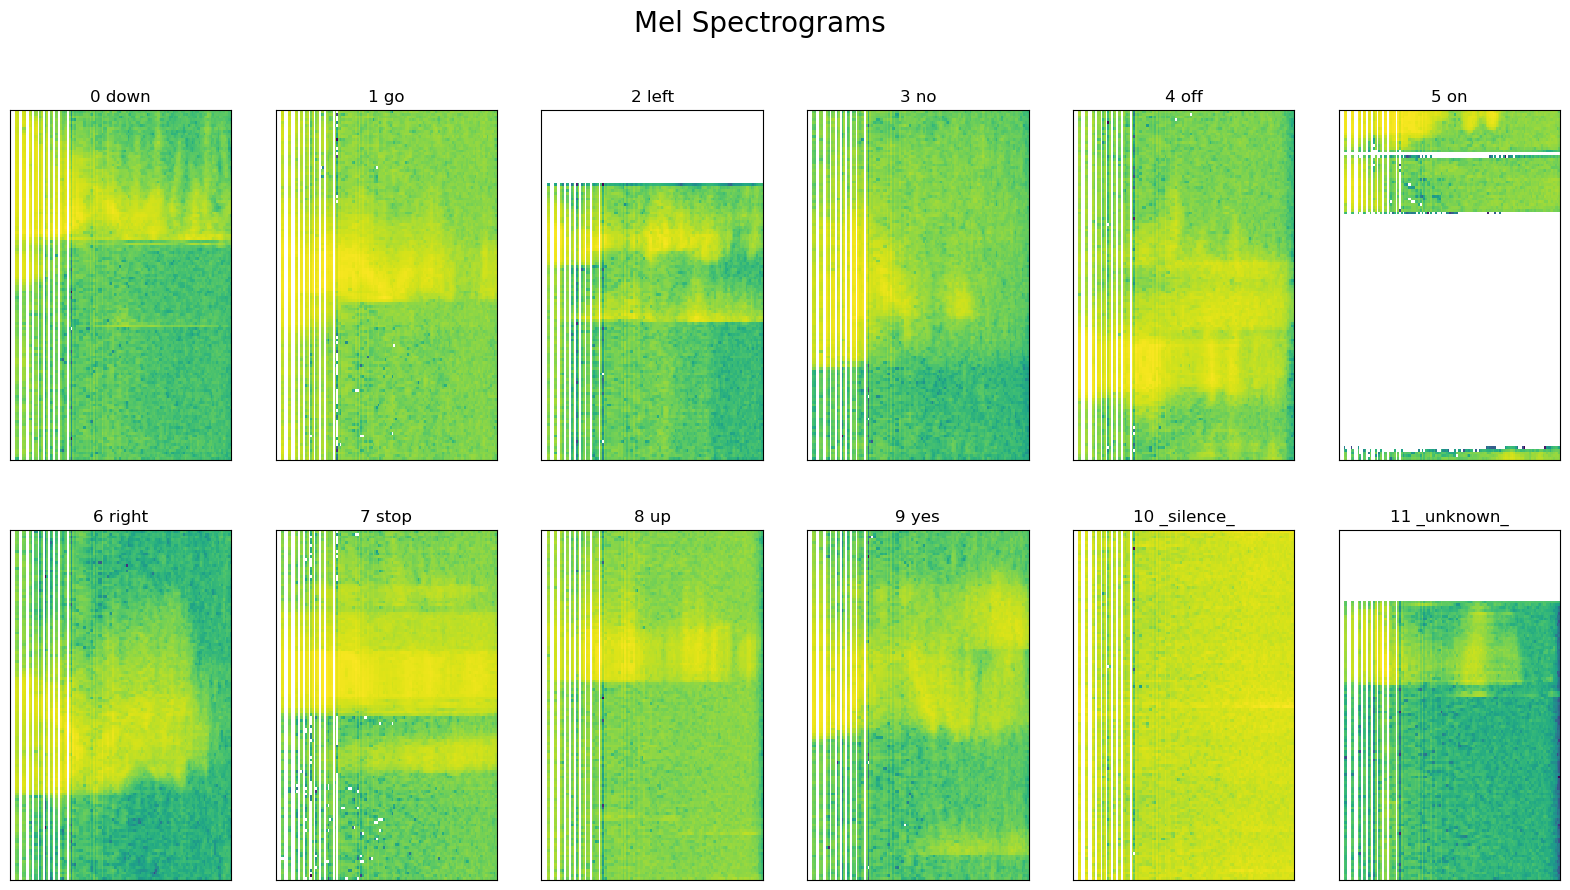

In [77]:
plot_spectrogram(titles, mel_spectrograms, 'Mel Spectrograms')

In [25]:
def create_MFCCs(audio):
    """
    Create MFCCs from an audio tensor.
    
    Args:
    audio (tf.Tensor): A 1D tensor containing the audio samples.
    
    Returns:
    tf.Tensor: A 2D tensor containing the MFCCs.
    """
    audio = tf.cast(audio, tf.float32)
    # audio = tfio.audio.resample(audio, 16000, 8000)
    audio = audio[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([audio, zero_padding], 0)
    audio = tf.signal.stft(audio, frame_length=255, frame_step=128)
    audio = tf.abs(audio)
    audio = tfio.audio.melscale(audio, rate=16000, mels=128, fmin=0, fmax=8000)
    audio = tf.math.log(audio + 1e-6)
    audio = tf.transpose(audio)
    audio = tf.signal.mfccs_from_log_mel_spectrograms(audio)
    
    return audio

In [26]:
MFCCs = [create_MFCCs(item['audio']).numpy() for item in categorial_tensors]

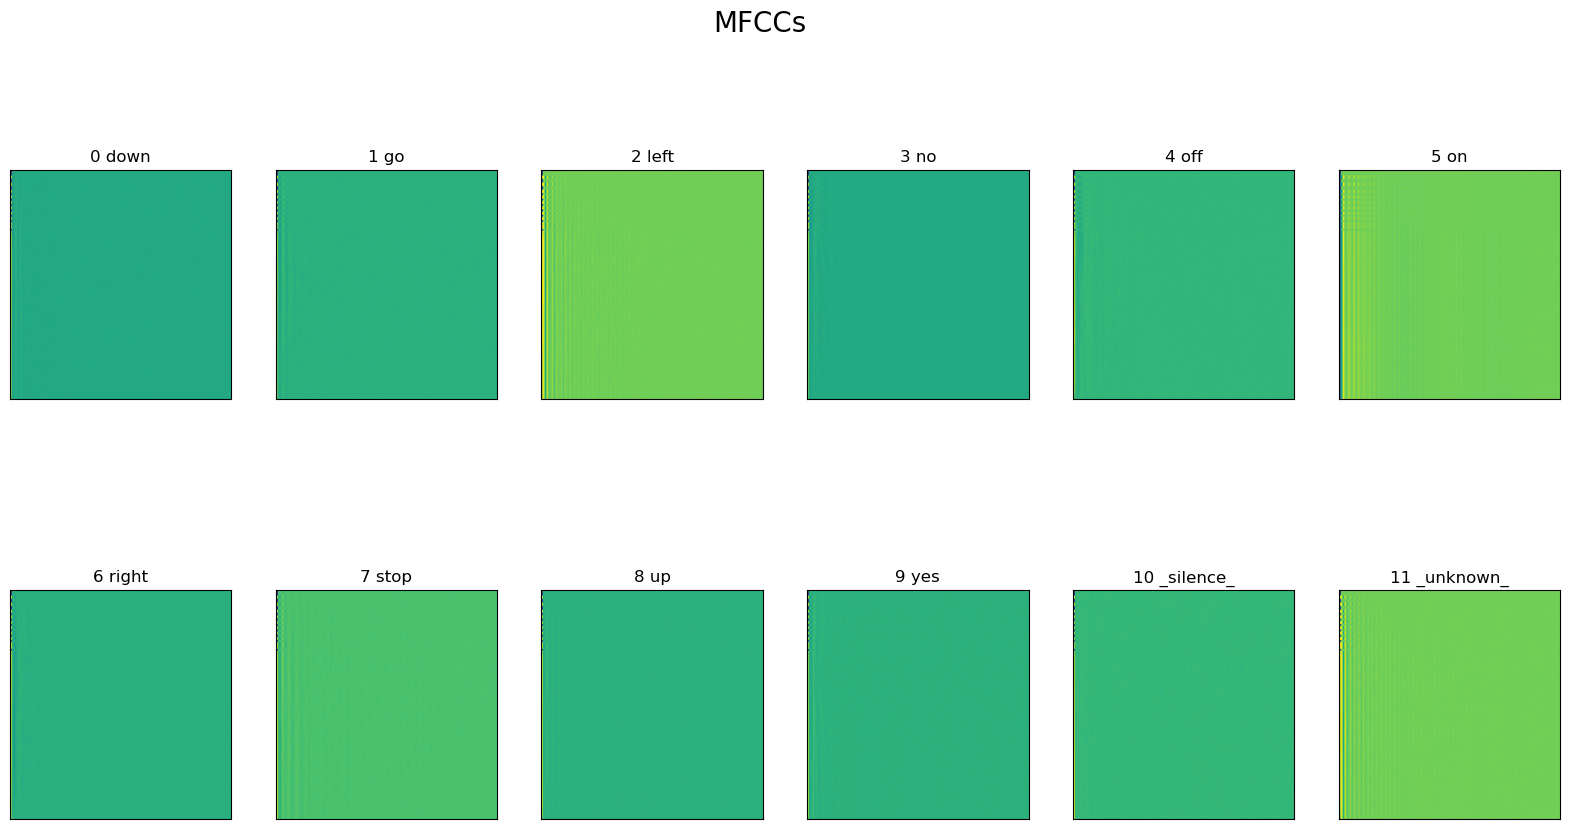

In [27]:
plot_spectrogram(titles, MFCCs, 'MFCCs', shape=(20, 10))

In [30]:
import numpy as np
from librosa.feature import melspectrogram

def create_mel_spectrogram_librosa(audio):
    """
    Create a mel spectrogram from an audio tensor using Librosa.
    
    Args:
    audio (tf.Tensor): A 1D tensor containing the audio samples.
    
    Returns:
    np.ndarray: A 2D numpy array containing the mel spectrogram.
    """
    audio = audio.numpy()
    mel_spectrogram = melspectrogram(y=audio, sr=16000, n_mels=128, fmin=0, fmax=8000)
    mel_spectrogram = np.log(mel_spectrogram + 1e-9)
    
    return mel_spectrogram

In [34]:
mel_spectrograms_librosa = [create_mel_spectrogram_librosa(tf.cast(item['audio'], tf.float32)) for item in categorial_tensors]

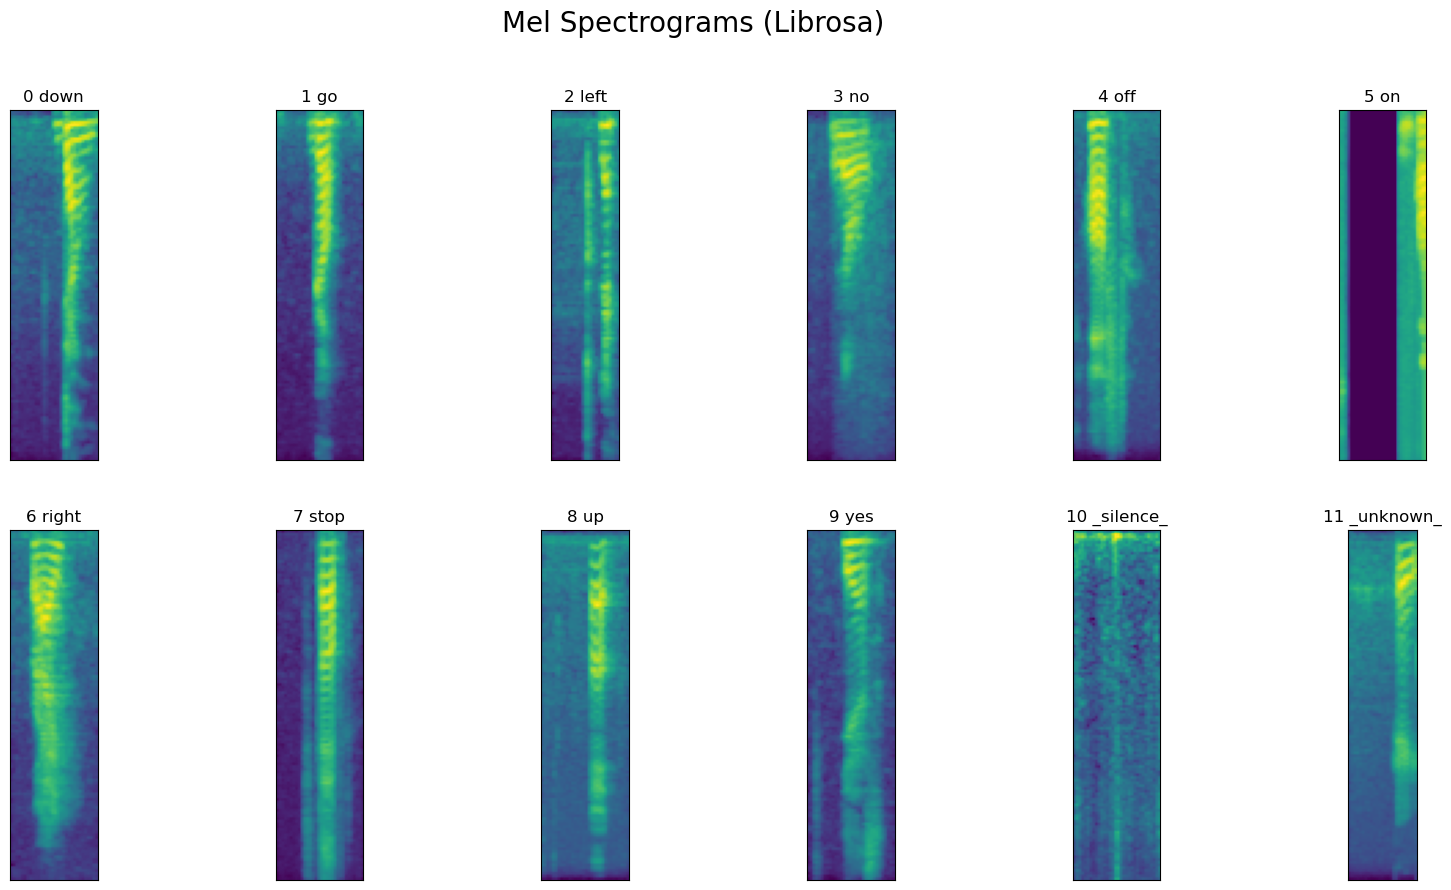

In [35]:
plot_spectrogram(titles, mel_spectrograms_librosa, 'Mel Spectrograms (Librosa)', shape=(20, 10))

In [46]:
from librosa.feature import mfcc

def create_MFCCs_librosa(audio):
    """
    Create MFCCs from an audio tensor using Librosa.
    
    Args:
    audio (tf.Tensor): A 1D tensor containing the audio samples.
    
    Returns:
    np.ndarray: A 2D numpy array containing the MFCCs.
    """
    audio = audio.numpy()
    # MFCCs = mfcc(y=audio, sr=16000, n_mfcc=13, n_mels=128, fmin=0, fmax=8000)
    MFCCs = mfcc(y=audio, sr=16000, n_mfcc=13, n_fft=400, hop_length=160, n_mels=40, fmin=0, fmax=8000)
    return MFCCs

In [47]:
MFCCs_librosa = [create_MFCCs_librosa(tf.cast(item['audio'], tf.float32)) for item in categorial_tensors]

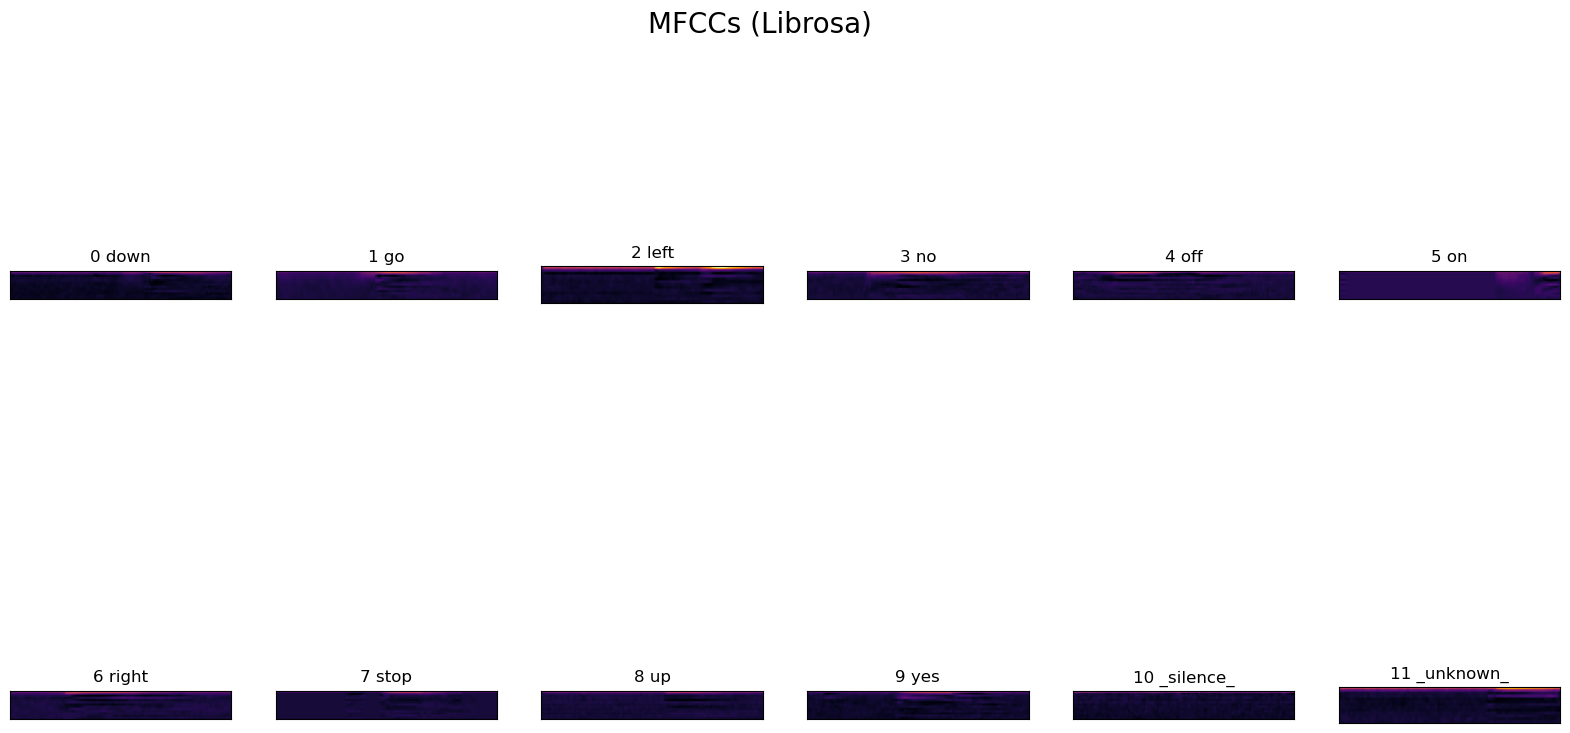

In [50]:
plot_spectrogram(titles, MFCCs_librosa, 'MFCCs (Librosa)', shape=(20, 10))

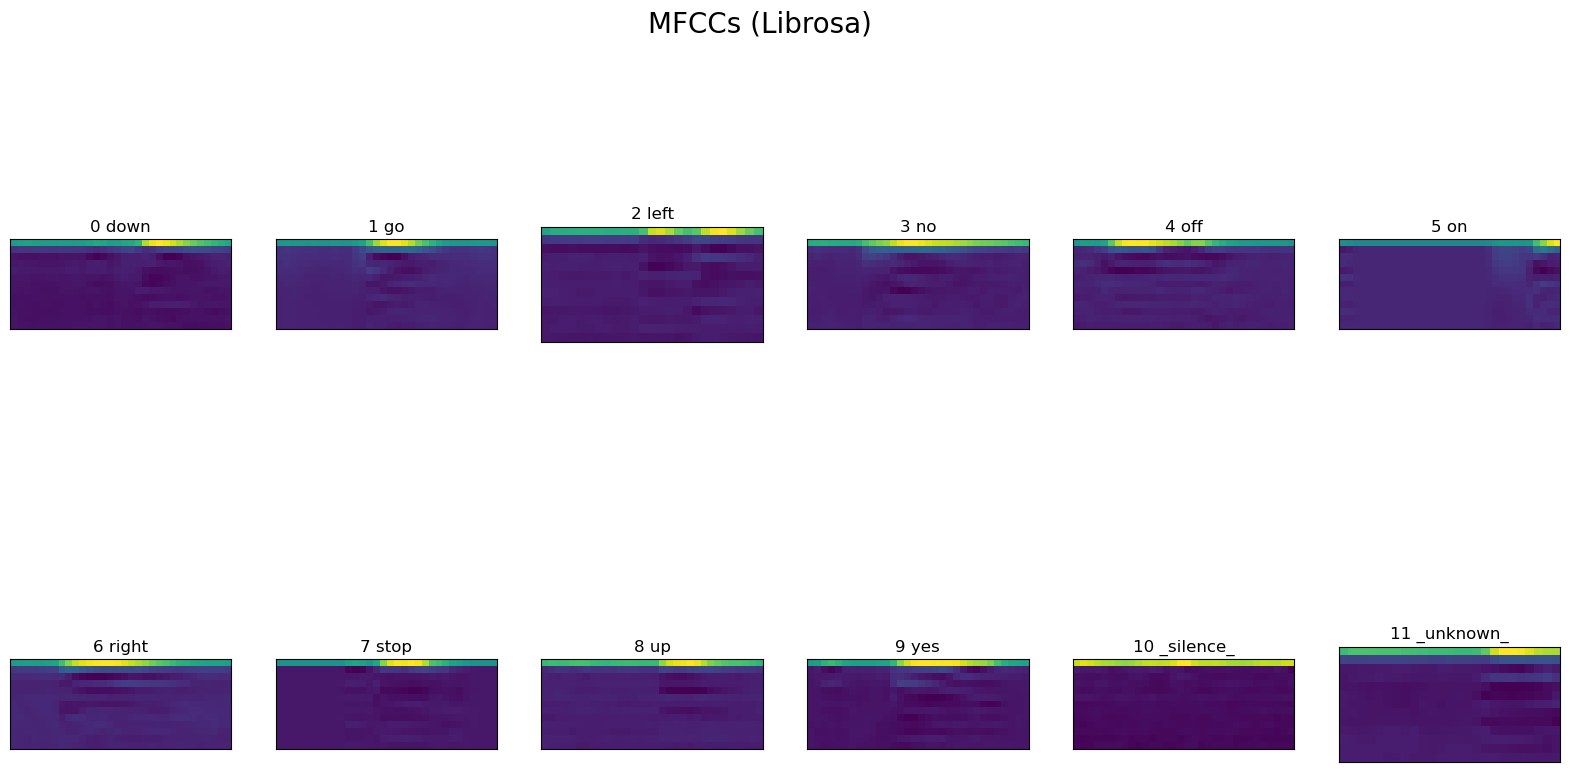

In [38]:
plot_spectrogram(titles, MFCCs_librosa, 'MFCCs (Librosa)', shape=(20, 10))

In [65]:
# custom MFCC function
# An integer representing the sampling rate.
sr = 16000
# An integer scalar Tensor. The window length in samples.
frame_length = int(sr/40) #25 ms
# An integer scalar Tensor. The number of samples to step.
frame_step = int(sr/100) #10 ms
# An integer scalar Tensor. The size of the FFT to apply.
fft_length = int(sr/40) #25 ms
# An integer representing the num of filterbanks.
num_feats = 40

def get_mfccs(
        audio,
        channels= 1,
        sample_rate= 16000,
        frame_length= 400,
        frame_step = 160,
        fft_length = 400,
        num_feats = 40
    ):
    audio = tf.cast(audio, tf.float32)

    stfts = tf.signal.stft(audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length)

    spectrograms = tf.abs(stfts)

    # Warp the linear scale spectrograms into the mel-scale.
    num_spectrogram_bins = stfts.shape[-1]
    lower_edge_hertz, upper_edge_hertz, num_mel_bins = 0 , sample_rate/2, num_feats
    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
      num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz, upper_edge_hertz)
    mel_spectrograms = tf.tensordot(
      spectrograms, linear_to_mel_weight_matrix, 1)
    mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(
      linear_to_mel_weight_matrix.shape[-1:]))

    # Compute a stabilized log to get log-magnitude mel-scale spectrograms.
    log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

    # Compute MFCCs from log_mel_spectrograms
    mfccs = tf.signal.mfccs_from_log_mel_spectrograms(
      log_mel_spectrograms)
    mfccs = mfccs[..., tf.newaxis]

    return mfccs

# Preprocessing function
def preprocess(example):
    audio = example['audio']
    label = example['label']
    mfccs = get_mfccs(audio)
    return mfccs, label

In [81]:
MFCCS_custom = [get_mfccs(item['audio']).numpy() for item in categorial_tensors]

In [85]:
# try new plot function specifically for MFCCs
def plot_MFCCs(titles, signals, title, shape=(20, 10)):
    nrows, ncols = 2, 6
    fig, ax = plt.subplots(nrows, ncols, figsize=shape)
    fig.suptitle(title, size=20)
    plt.set_cmap('viridis')

    z = 0
    for i in range(nrows):
        for y in range(ncols):
            if z < len(signals):
                ax[i, y].set_title(titles[z])
                mfcc = signals[z]
                if len(mfcc.shape) > 2:
                    mfcc = np.squeeze(mfcc, axis=-1)
                # Convert the frequencies to log scale and transpose
                log_spec = np.log(mfcc.T + np.finfo(float).eps)
                height = log_spec.shape[0]
                width = log_spec.shape[1]
                X = np.linspace(0, np.size(mfcc), num=width, dtype=int)
                Y = range(height)
                ax[i, y].pcolormesh(X, Y, log_spec)
                ax[i, y].set_xticks([])
                ax[i, y].set_yticks([])
                ax[i, y].grid(False)
                z += 1
            else:
                ax[i, y].axis('off')  # Hide empty subplots

    plt.show()

/var/folders/nr/ykp9ym8x5rx7j1fpkhs32n880000gn/T/ipykernel_64539/2786809578.py:16: RuntimeWarning: invalid value encountered in log
  log_spec = np.log(mfcc.T + np.finfo(float).eps)


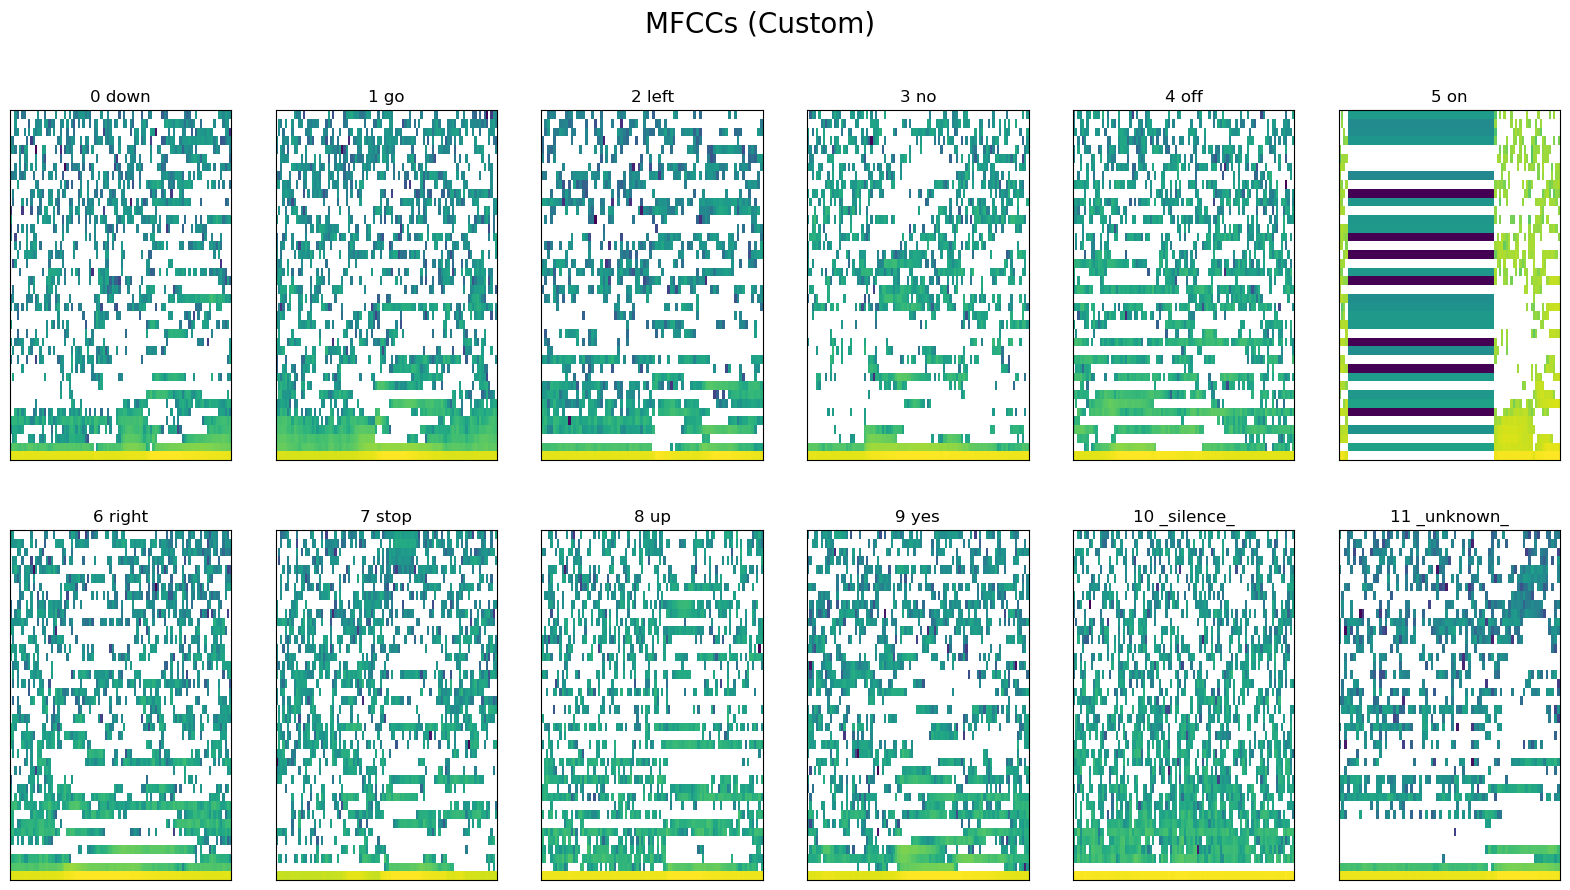

In [83]:
plot_MFCCs(titles, MFCCS_custom, 'MFCCs (Custom)', shape=(20, 10))

/var/folders/nr/ykp9ym8x5rx7j1fpkhs32n880000gn/T/ipykernel_64539/2786809578.py:16: RuntimeWarning: invalid value encountered in log
  log_spec = np.log(mfcc.T + np.finfo(float).eps)


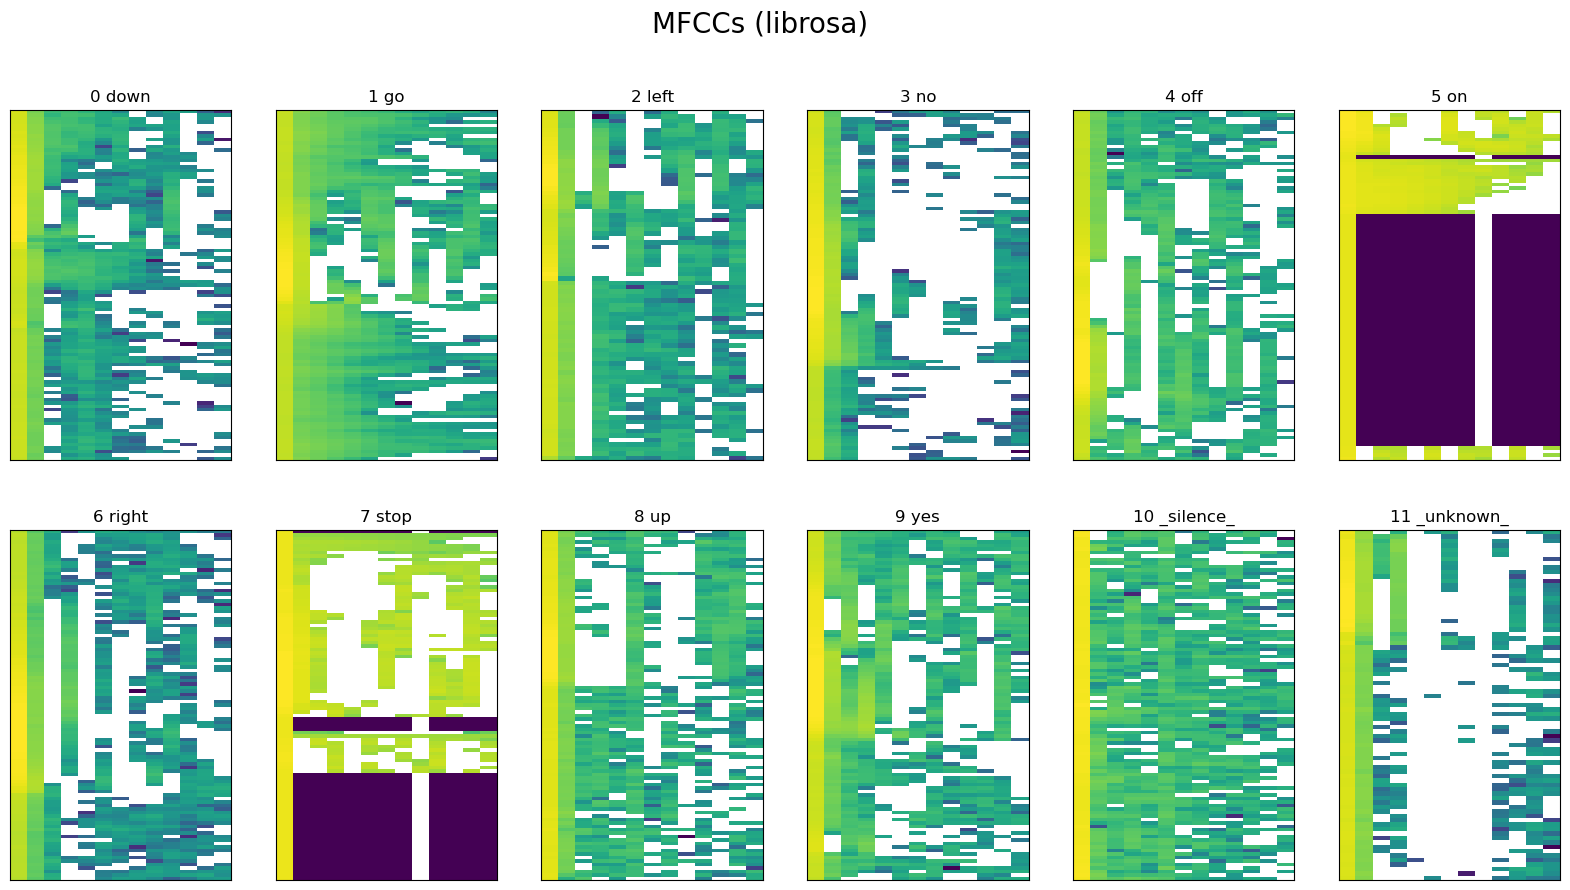

In [84]:
plot_MFCCs(titles, MFCCs_librosa, 'MFCCs (librosa)', shape=(20, 10))

/var/folders/nr/ykp9ym8x5rx7j1fpkhs32n880000gn/T/ipykernel_64539/3951518447.py:17: RuntimeWarning: invalid value encountered in log
  log_spec = np.log(mfcc.T + np.finfo(float).eps)


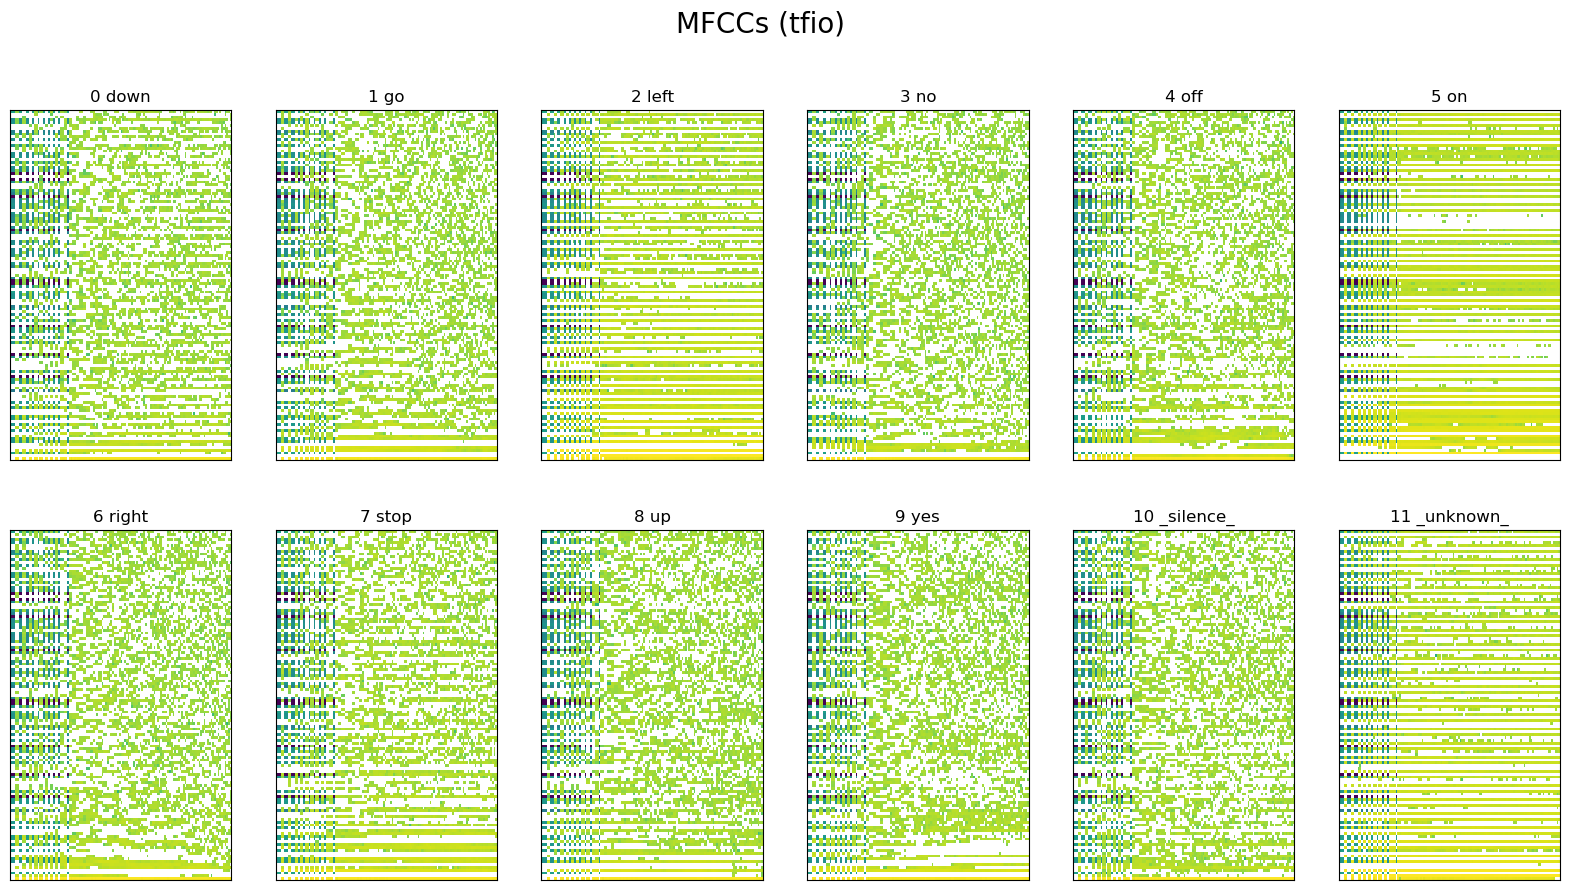

In [86]:
plot_MFCCs(titles, MFCCs, 'MFCCs (tfio)', shape=(20, 10))